# TAREA 1

## INTRODUCCIÓN

En mi TFG estoy trabajando con *Marchantia polymorpha*, una planta que se está erigiendo como un potencial organismo modelo. Se trata de una planta terreste perteneciente a los briófitos, concretamente a las hepáticas. Los briófitos, fueron el primer grupo de plantas terrestres que se diversificó, así que se trata de una planta terrestre muy primitiva. El TFG consiste en encontrar genes que se expresen en el meristemo y no en el resto de la planta. A partir de un RNASeq (para el análisis de expresión de RNA) donde se analizava la expresión en la zona del meristemo comparada con la expresión en una zona control, elejimos 4 genes en base a distintos criterios. La selección se puede resumir en que dos genes tenian una expresión muy alta en el meristemo y una expresión menor en la zona control (menos de la mitad) y los otros dos tenian una expresión cercana a 0 en la zona control y cierta expresión el el meristemo.

Clonamos los promotores de estos genes en vectores de expresión fusionados a la proteina GUS y con esto transformamos *Marchantia polymorpha*. Posteriormente revelamos para poder obtener el característico color azul de GUS cuando reacciona con X-Glu. El resultado se podria catalogar de muy bueno, puesto que hasta la fecha, tres de estos promotores tienen expresión visible en el meristemo. Además, dos de ellos tienen una expresión muy concentrada.

Uno de estos genes es Mp7g07600. Se trata de una peroxidasa, según fuentes como "phytozome" y "marchantia info". El objetivo que planteo es poder analizar la proteina codificada por este gen y obtener información al respecto. Para ello seguiré el modelo de ejemplo proporcionado pero aplicandolo a este concreto con alguna modificación. 

## PREPARACIÓN DEL AMBIENTE DE COMPUTACIÓN
Como en el ejemplo proporcionado, instalaremos BLAST y descomprimiremos el archivo "taxdb.btd.gz". Utilizaremos para ello el *script* de BASH: `preparar_ambiente.sh`. Utilizaremos el siguiente comando:

In [4]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

En este caso, no utilizaré ninguna de las proteinas proporcionadas, así que tendré que descargar y subir a este ambiente el archivo FASTA de la proteina que voy a utilizar para realizar el análisis. Para ello, teclearemos en el buscador de internet "marchantia info". Se trata de una web dedicada a *Marchantia polimorpha* donde vamos a poder encontrar el archivo FASTA de la proteina en cuestión. En la página inicial, tecleamos en el búscador "Mp7g07600". Después de darle a buscar, bajamos hacia la parte baja de la web y a la altura de "protein" clicamos en FASTA. Copiamos y pegamos en un bloc de notas y lo guardamos como "Mp7g07600.fas". Solo quedaría subir el archivo a este ambiente.

## MÉTODOS

Usaré la base de datos Swissprot ya instalada en este ambiente para buscar homologías con la proteina en cuestión y analizar la coherencia del resultado. Veré si se trata de una proteina conservada y si se ha mantenido en el reino de las plantas y si en organismos más ancestrales a las plantas terrestres también está presente. También compararé **blastp** con **psiblast**.

Para intentar esclarecer lo anteriormente propuesto, recurriré a **blastp** con diferentes umbrales de valor E e intintaré razonar de forma crítica los resultados obtenidos. Asi mismo, comprobaré que aumenta la diversidad taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido (un valor E mayor).

## RESULTADOS

### BLASTP INDIVIDUAL

He hecho una primera buscadeda con blasp con un valor E muy exigente. Así que los resultados que obtenga serán secuencias muy parecidas a la secuencia de esta peroxidasa. Para realizar el blastp, le he indicado la base de datos Swissprot, para la "query" mi fichero fasta y un valor E de 1.0e-50. En el formato de salida, he añadido alguna característica más que me parecía interesante saber respecto al ejemplo.

In [5]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'Mp7g07600.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send qlen slen nident mismatch gapopen evalue staxid ssciname sblastname "'),
                      stdout = TRUE)

Para poder ver mejor los resultados, construyo una tabla con todo lo anterior con la función `read table()` y `text connection()`. Le doy el nombre a las columnas mediante la opción "col.name" según el formato de salida de la función anterior:

In [6]:
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'qlen', 'slen', 'nident', 'mismatch', 'gapopen', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Puedo saber las dimensiones de la tabla mediante la siguiente función y así comprovar que tiene las columnas que quiero:

In [7]:
dim(TablaOut01)

[1] 45 16

Veo que tiene 45 secuencias suficientemente parecidas a la query según el valor E que le he pedido y 16 columnas con todos los datos que le he pedido según el formato de salida. Ahora visualizaré la tabla:

In [8]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,qlen,slen,nident,mismatch,gapopen,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
Q9LSP0.2,46.926,309,39,337,37,339,405,339,145,148,7,1.58e-84,3702,Arabidopsis thaliana,eudicots
Q43729.1,42.904,303,40,337,24,313,405,313,130,155,5,1.05e-72,3702,Arabidopsis thaliana,eudicots
Q42580.1,37.954,303,38,337,28,327,405,327,115,182,5,1.18e-70,3702,Arabidopsis thaliana,eudicots
Q9SS67.1,41.369,336,11,337,1,321,405,321,139,173,7,1.04e-68,3702,Arabidopsis thaliana,eudicots
O23609.1,39.286,308,34,339,20,324,405,326,121,182,3,1.40e-68,3702,Arabidopsis thaliana,eudicots
Q9SB81.2,35.258,329,12,338,3,328,405,330,116,208,4,8.43e-68,3702,Arabidopsis thaliana,eudicots
Q96520.1,37.758,339,3,337,5,339,405,358,128,203,5,1.81e-64,3702,Arabidopsis thaliana,eudicots
Q93V93.1,41.611,298,40,337,22,309,405,310,124,164,4,1.93e-64,3702,Arabidopsis thaliana,eudicots
Q9SJZ2.1,41.042,307,40,340,23,322,405,329,126,168,7,1.83e-62,3702,Arabidopsis thaliana,eudicots


En esta tabla puedo observar, además de todo lo del ejemplo, la longitud de la "query" (siempre es la misma), la longitud de la "subject", el número de "matches", de "missmatches" y el número de gaps que ha abierto en el alineamiento. Las columnas quedan:
- **saccver**: número de acceso o identificador de la secuencia encontrada ("subject").
- **pident**: porcentaje de identidad entre la "query" y el "subject" en su alineamiento local.
- **length**: longitud del alineamiento entre "query" y "subject".
- **qstart**: primera posición de la "query" alineada.
- **qend**: última posición alineada en la "query".
- **sstart**: primera posición de la "subject" alineada.
- **send**: última posición de la "subject" alineada.
- **qlen**: longitud de la "query".
- **slen**: longitud de la "subject".
- **nident**: número de "matches".
- **mismatch**: número de "missmatches".
- **gapopen**: número de "gaps" abiertos en el alineammiento.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la "subject", en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la "subject".
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la "subject", usado para facilitar la interpretación.

### BLASTP EN SERIE
Ahora  haré un blast menos exigente con diferentes valores de E. Comprovaremos que cuanto mayor sea este valor, más coincidencias encontrará. Para ello crearemos un vector con diferentes valores de E y utilizaremos la función `lapply()` donde usaremos el mismo comando que en el caso anterior pero en el argumento "-evalue" pondremos una x(significa que está en función de x que le indicaremos que será el vector con los valores de E). Esta vez para el formato de salida no le exigeremos tanto como el anterior(obtendremos tablas más sencillas). Todo quedará encuadrado en el objeto "lista de tablas":

In [49]:
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'Mp7g07600.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Puedo ver la parte final de una de las tablas con la siguiente función y marcándole con doble corchetes el número de la tabla que quiero ver del objeto que he creado antes:

In [10]:
tail(Lista_de_Tablas[[5]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
107,O04796.1,32.056,287,57,337,77,348,3.85e-29,4120,Ipomoea batatas,eudicots
108,O04795.1,32.364,275,72,343,91,353,4.22e-28,4120,Ipomoea batatas,eudicots
109,Q01548.1,34.969,163,187,347,3,164,1.71e-19,4513,Hordeum vulgare,monocots
110,P16147.2,32.544,169,178,337,2,158,2.99e-17,3874,Lupinus polyphyllus,eudicots
111,P15984.1,50.000,70,109,178,3,67,1.01e-12,4565,Triticum aestivum,monocots
112,Q1PER6.3,31.746,189,134,318,92,244,4.61e-11,3702,Arabidopsis thaliana,eudicots


Con la función `dim()` puedo pedirle el número de filas que equivale al número de secuencias homólogas que la función blast ha encontrado para cada valor E del vector anterior. Solo le pido que me de la primera dimensión correspondiente a las filas:

In [11]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  45  92 103 108 112 114 118 130 142 196

Se ve claramente que cuanto más valor E, más homologías encuentra.

Ahora representaré el número de resultados y el valor E en una gráfica para ver la relación graficamente mediante la funció `plo()` en escala logarítmica para los dos ejes:

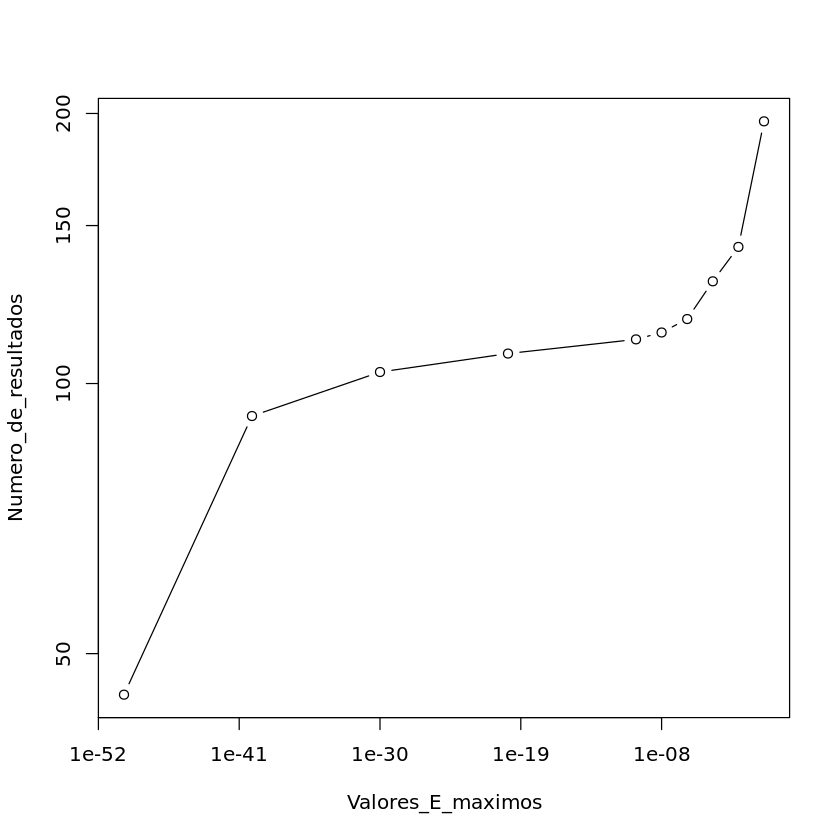

In [12]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy' , type = 'b')

El resultado no es una curva como en el ejemplo proporcionado, mas bien es una curva sigmoidea. Pero siempre es ascendente el número de resultados cuando aumenta el valor E. Se puede apreciar que entre los valore 1e-41 y 1e-08, no hay un aumento realmente notorio, eso significa que cuando hagamos un pblast entre estos valores de E no encontraremos mucha diferencia. Sin embargo por arriba y por abajo de estos sí.

A continuación, examino la relación entre la longitud del alineamiento y el valor E de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un mayor número de resultados. Para ello, utilizaré la función `plot()` y el conjunto de tablas "Lista_de_tablas" para la 10. Con el signo del dollar extraigo las columnas de interés. En este caso el e-value y lenght. También le daré nombre a los ejes:

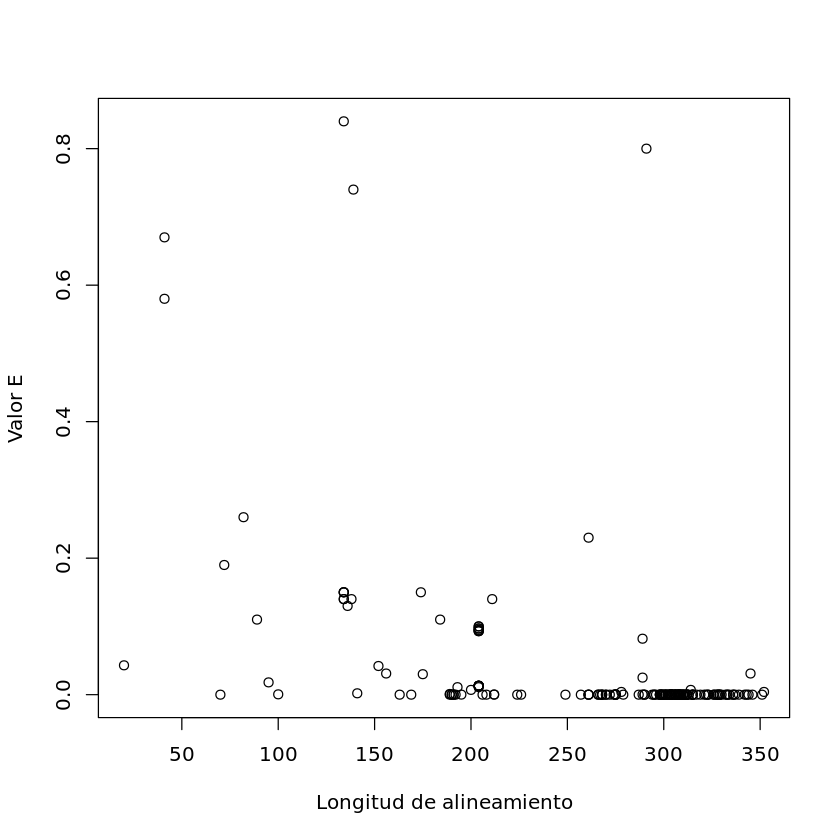

In [13]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

El gráfico es completamente diferente al del ejemplo. En este se observa que muchos de los alineamientos son de alta longitud y un valor E muy bajo. Esto sugiere que la proteína en su mayoria ha estado conservada y no dominios concretos. Hay muchos alineamientos por encima de las 300 bases, teniendo en cuenta que la "query" tiene una longitud de 405, implica que en muchos casos comparten más de un tercio de secuencia de aa. Tal vez tenga solo un dominio importante. En la discusión extenderé el razonamineto.

Seguidamente, analizaré que parte o partes de la proteina de interés ("query") son las que presentan mayor parecido con las secuencias de las  proteínas encontradas. Primero defino unos vectores con las columnas de interés:

In [14]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

Después, con la función `segments()` añadiré segmentos a un gráfico prévio vacio (type='n'). Pero antes debe determinar el valor máximo de "qend" para el rango del eje horizontal:

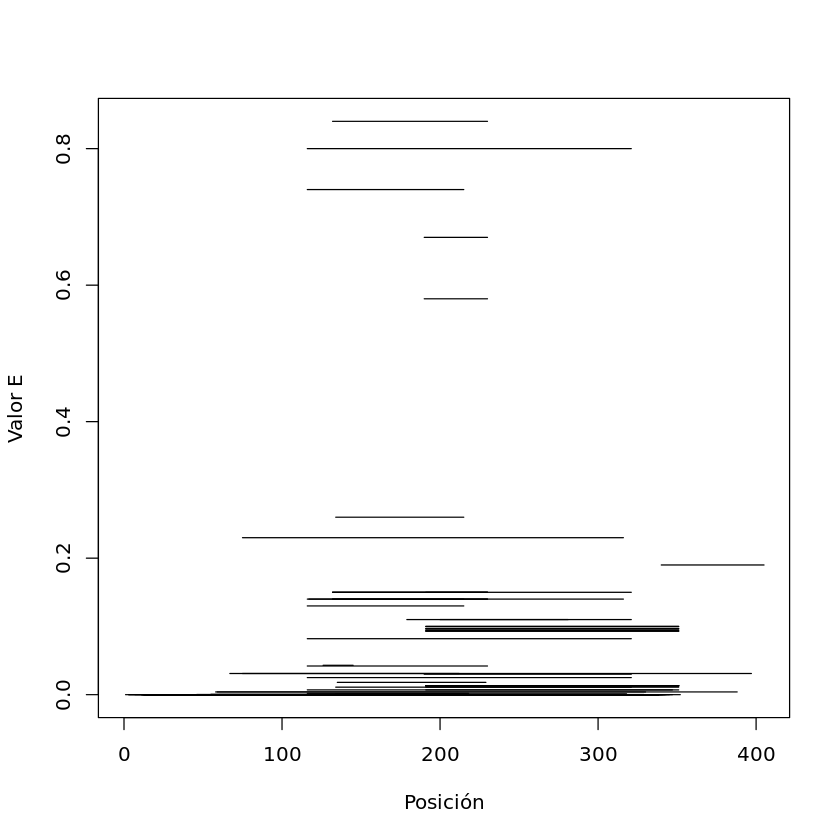

In [15]:
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

De este gráfico se puede deducir que la parte homóloga de las proteinas encontradas respecto a la "query" efectivamente es una gran parte de la secuencia de aa. Se observa que en mucho de los casos solo se diferencian un poco por los extremos. Debe tratarse de una proteina bastante conservada en cuanto a su secuencia de aa.

El siguiente paso es analizar los grupos taxonómicos que presentan proteinas homólogas o parcialmente homólogas al a peroxidasa utilizada como "query". Lo haré para cada una de las diez tablas que he creado con valores diferentes del valor E. Para ello contaré para cada tabla las secuencias encontradas de cada grupo taxonómico mediante la función `table()` para la columna "sblastname" de cada tabla indicándolo con el signo del dollar. Lo englobaré todo en la función `lapply()` para hacer las diez tablas de forma automática:

In [16]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

eudicots monocots 
      39        6 

[[2]]

eudicots monocots 
      83        9 

[[3]]

eudicots monocots 
      92       11 

[[4]]

eudicots monocots 
      97       11 

[[5]]

eudicots monocots 
      99       13 

[[6]]

budding yeasts       eudicots       monocots 
             1            100             13 

[[7]]

basidiomycetes budding yeasts       eudicots       monocots 
             1              1            101             15 

[[8]]

   ascomycetes basidiomycetes budding yeasts       eudicots       monocots 
             2              3              3            103             19 

[[9]]

   ascomycetes basidiomycetes budding yeasts       eudicots       monocots 
             4              5              6            105             22 

[[10]]

     aquificales      ascomycetes   basidiomycetes   budding yeasts 
               1               12                7                8 
   cyanobacteria   enterobacteria         eudicots   euryarchaeotes 
     

En las primeras tablas con un valor de E muy bajo, solo se encuentran plantas eudocotiledoneas y monocotiledoneas que son angiospermas. Es decir, la proteína se ha conservado hasta las plantas superiores. En la tabla seis con un valor de E más alto, ya aparece una levadura y en las siguientes 3 aparecen algunos pocos hongos. Habrá que analizar posteriormente como de homólogas son las secuencias. En la última tabla también hay algunas bacterias, arqueas y cnidarios (hidrozoans).

En principio, hay homologías en los tes grandes grupos (bacterias, eucariotas y arquea). Al tratarse de una peroxidasa es presumible que todos estos grupos necesiten de una proteina con esa función. Repito el recuento de grupos taxonómicos pero contando solamente las secuencias con un alineamiento de al menos 300 aminoácidos (prácticamente un tercio de homología) para ver realmente cuales tienen un grado de similitud más extricto. 

In [3]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

eudicots monocots 
      33        3 

[[2]]

eudicots monocots 
      75        5 

[[3]]

eudicots monocots 
      84        7 

[[4]]

eudicots monocots 
      84        7 

[[5]]

eudicots monocots 
      84        7 

[[6]]

budding yeasts       eudicots       monocots 
             1             84              7 

[[7]]

basidiomycetes budding yeasts       eudicots       monocots 
             0              1             84              7 

[[8]]

   ascomycetes basidiomycetes budding yeasts       eudicots       monocots 
             0              1              1             84              7 

[[9]]

   ascomycetes basidiomycetes budding yeasts       eudicots       monocots 
             0              2              1             84              7 

[[10]]

     aquificales      ascomycetes   basidiomycetes   budding yeasts 
               0                0                3                1 
   cyanobacteria   enterobacteria         eudicots   euryarchaeotes 
     

Hay algún resultado interesante, como una enterobacteria. El resultado obtenido en las angiospermas (monocotiledoneas y eudocotiledoneas) es esperable, puesto que són superioares a *Marchantia polymorpha* y también los hongos (basydeomycetes) y levaduras porque su divergencia con las plantas es relativamente reciente.

### PSI-BLAST

Voy a ejecutar una búsqueda psiblast para comparar la búsqueda anterior con esta que deberia ser menos sesgada. Utilizaré el siguiente comando (muy parecido al anterior). Le indicaré para el E valor de la primera matriz el mismo número que el valor E más alto de la ejecución del blastp en serie anterior (para que tenga en cuenta organismos bastante diferentes).  Al de las secuencias a incluir será un valor también relativamente alto para ver si obtenemos alguna secuencia más. Le daré 0 como número de interacciones para que llegue a la convergéncia.

In [28]:
PsiblastOut01 <- system2(command = 'psiblast',
         args = c('-db', 'swissprot',
                 '-query', 'Mp7g07600.fas',
                 '-evalue', '1',
                 '-inclusion_ethresh', '1',
                 '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
       wait=TRUE,
       stdout=TRUE)

Construyo una tabla con todo lo anterior con la función `read table()` y `text connection()`. Le doy el nombre a las columnas mediante la opción "col.name" según el formato de salida de la función anterior y la visualizo:

In [29]:
TablaOut02 <- read.table(textConnection(PsiblastOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

In [30]:
dim(TablaOut02)

[1] 196  11

Curiosamente da el mismo número de secuencias que en blasp en serie anterior. Contaré para la tabla creada las secuencias encontradas de cada grupo taxonómico mediante la función `table()` para la columna "sblastname".  Tambien le aplicare el filtro para que las secuencias tengan al menos un alineamiento de 300 aa.

In [45]:
calification <- TablaOut02$sblastname
filtro <- TablaOut02$length >= 300

In [46]:
table(filtro, calification)

       calification
filtro  aquificales ascomycetes basidiomycetes budding yeasts cyanobacteria
  FALSE           1          12              4              7             2
  TRUE            0           0              3              1             0
       calification
filtro  enterobacteria eudicots euryarchaeotes firmicutes g-proteobacteria
  FALSE             18       23              1          4                7
  TRUE               1       84              0          0                0
       calification
filtro  high GC Gram+ hydrozoans monocots seed plants smut fungi
  FALSE             1          1       16           1          2
  TRUE              0          0        7           0          0

Obtenemos el recuento con el filtro aplicado y sin él. Ahora lo compararemos con el resultado del blastp en serie para el mismo valo de E:

In [50]:
calification2 <- Lista_de_Tablas[[10]]$sblastname
filtro2 <- Lista_de_Tablas[[10]]$length >= 300

In [51]:
table(filtro2, calification2)

       calification2
filtro2 aquificales ascomycetes basidiomycetes budding yeasts cyanobacteria
  FALSE           1          12              4              7             2
  TRUE            0           0              3              1             0
       calification2
filtro2 enterobacteria eudicots euryarchaeotes firmicutes g-proteobacteria
  FALSE             18       23              1          4                7
  TRUE               1       84              0          0                0
       calification2
filtro2 high GC Gram+ hydrozoans monocots seed plants smut fungi
  FALSE             1          1       16           1          2
  TRUE              0          0        7           0          0

Ahora que tenemos las dos juntas, podemos ver que son los mismos grupos taxonómicos. Los dos tipos de blast me han dado el mismo resultado para un mismo valor de E.

## DISCUSIÓN

Primeramente hice un busqueda de blastp muy estricta utilizando la secuencia de una peroxidadsa que codifica el gen Mp7g07600 de *Marchantia polymorpha* que es objeto de estudio en mi TFG. Con un valor E muy bajo (1.0e-50) para evitar tener resultados positivos por pura casualidad, ejecuté la búsqueda y obtuve unos resultados bastante coherentes. Obtuve 16 secuencias significativamente parecidas a la proteina de consulta y todas eran de plantas monocotiledoneas y eudocotiledoneas pertenecientes al grupo de angiospermas. Este grupo de plantas más desarrolladas que *Marchantia polymorpha*, así que se trata de una proteina que ha sido conservada hasta las plantas más superiores.

Hice un blastp en serie con diferentes valores de E menos exigentes (desde 1.0e-50 a 1). En el gráfico se aprecia que es ascendente el número de resultados cuando aumenta el valor E pero con forma sigmoidea. Entre los valore 1e-41 y 1e-08, no hay un aumento realmente notorio, eso significa que cuando hagamos un pblast entre estos valores de E no encontraremos mucha diferencia. Sin embargo por arriba y por abajo de estos sí. He examinado la relación entre la longitud del alineamiento y el valor E de los resultados en la tabla de mayor valor E contruyendo un gráfico. Se observa que muchos de los alineamientos son de alta longitud y un valor E relativamente bajo. Hay muchos alineamientos por encima de las 300 bases, teniendo en cuenta que la "query" tiene una longitud de 405, significa que en muchos casos comparten más de un tercio de secuencia de aa. Parece indicar que se trata de una proteina conservada en la totalidad de su secuencia y no en algún dominio únicamente. Posiblemente se trate de una proteina de un solo dominio, esto explicaría este tipo de conservación. 

Seguidamente, analizé que parte o partes de la proteina de interés ("query") son las que presentan mayor parecido con las proteinas encontradas. El resultado fue el esperado, pues la proteina parecia tener un solo dominio conservado de unos 300 aa. Para el vlor E más grande, obtuve secuencias de arqueas, bacterias y eucariotas (hongos, levoduras y angiospermas). Esto significa que hay proteínas parecidas en los tres principales grupos del árbol de la vida, debe tratarse de una proteina realmente importante. Secuancias parecidas se han encontrado en organismos más lejanos filogenéticamente de *Marchantia polymorpha* y muy ancestrales, sugiriendo que este tipo de proteinas surgieron relativamente temprano. Al aplicar el filtro de almenos 300 aa alineados, los grupos taxonómicos se reducen bastante pero aun se mantienen algunas bacterias, hongos, levaduras y angiospermas.

Realice una búsqueda manual de la proteína en cuestión en la base de datos de pfam y se trata de una superfamilia de peroxidasas dependientes de grupo hemo. Se encuentran en una cantidad inmensa de organismos y en muchas de las secuencias (19777) en forma de un solo dominio, como había dicho anteriormente. Muchas otras (5202) han duplicado este dominio. Al ser una superfamilia de peroxidas explica que se encuentren secuencias en arqueas bacterias y eucariotas.

Rrealicé un psiblast para darle mayor profundidad al análisis, ya que es un método que tiene menos sesgos. El resultado obtenido fue exactamente el mismo que con el blastp. Así que se puede concluir que en este caso concreto, no hay diferencia entre ellos y que el análisis está apoyado por dos tipos de blast.

Cabe destacar que realicé una busqueda blastp de la secuencia objeto manualmente en la página del NCBI con un valor E de 1 y un máximo de secuencias como output de 250 y obtuve 250 secuencias con unos vlores de E muy bajos. Esto último significa que posiblemente haya muchisimas más secuancias homólogas que estas 250. En al análisis de este escrito realizado solo en la base de datos "swissprot" solo obtuve un total de 196 secuencias homólogas para el mismo valor E. Para realizar un trabajo más exhaustivo de esta proteina, seria conveniente realizarlo con la base de datos del NCBI, ya que la utilizada en este trabajo no está tan completa.

## BIBLIOGRAFIA
- Shimamura, M. (2016). Marchantia polymorpha: taxonomy, phylogeny and morphology of a model system. Plant and Cell Physiology, 57(2), 230-256.
- Bowman, J. L. (2016). A brief history of Marchantia from Greece to genomics. Plant and Cell Physiology, 57(2), 210-229.
- Solly, J. E., Cunniffe, N. J., & Harrison, C. J. (2017). Regional growth rate differences specified by apical notch activities regulate liverwort thallus shape. Current Biology, 27(1), 16-26.